In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
import glob

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [59]:
#data_dir = "../TC_run_re8.00e+01_mu0.00e+00_eta6.93e-01/"
#data_dir = "../TC_run_re8.00e+01_mu-1.50e+00_eta6.93e-01"
#data_dir = "../TC_run_re1.39e+02_mu0.00e+00_eta8.75e-01"
data_dir = "../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/"

In [60]:
slice_dir = os.path.join(data_dir,'slices')

In [61]:
slice_files = glob.glob(slice_dir+"/*.h5")

In [71]:
slice_files = sorted(slice_files, key=lambda x: int(os.path.split(x)[1].split('.')[0].split('_s')[1]))
slice_files

['../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s1.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s2.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s3.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s4.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s5.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s6.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s7.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s8.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s9.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s10.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s11.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s12.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s13.h5',
 '../GSF_run_re3.33e+03_mu9.43e-01_eta9.90e-01/slices/slices_s14.h5',
 '../GSF_run_re3.33e+03_mu9.4

In [72]:
data = h5py.File(slice_files[0],'r')

In [73]:
list(data['tasks'].keys())

['u', 'v', 'w']

In [74]:
list(data['scales'].keys())

['Tr',
 'constant',
 'iteration',
 'kz',
 'r',
 'sim_time',
 'wall_time',
 'write_number',
 'z']

In [75]:
v_ref = np.array([  9.99219157e-01,   9.92993738e-01,   9.80655737e-01,
         9.62426653e-01,   9.38628594e-01,   9.09672927e-01,
         8.76046380e-01,   8.38295477e-01,   7.97010147e-01,
         7.52807307e-01,   7.06315072e-01,   6.58158110e-01,
         6.08944558e-01,   5.59254848e-01,   5.09632704e-01,
         4.60578565e-01,   4.12545565e-01,   3.65938073e-01,
         3.21112615e-01,   2.78380789e-01,   2.38013643e-01,
         2.00246827e-01,   1.65285893e-01,   1.33311134e-01,
         1.04481556e-01,   7.89377458e-02,   5.68035933e-02,
         3.81869936e-02,   2.31797394e-02,   1.18568829e-02,
         4.27584315e-03,   4.75504554e-04])

In [89]:
prof_dir = os.path.join(data_dir,'profiles')
prof_files = glob.glob(prof_dir+"/*.h5")
prof_files = sorted(prof_files, key=lambda x: int(os.path.split(x)[1].split('.')[0].split('_s')[1]))

prof_data_ic = h5py.File(prof_files[0],'r')
prof_data_sat = h5py.File(prof_files[-1],'r')

In [90]:
list(prof_data_ic['tasks'].keys())

['KE', 'Re_rms', 'epicyclic_freq_sq', 'u_rms', 'v_rms', 'w_rms']

In [91]:
prof_data['scales']['r']['1.0'][:].shape
prof_data['tasks']['epicyclic_freq_sq'][:].shape

(20, 1, 128)

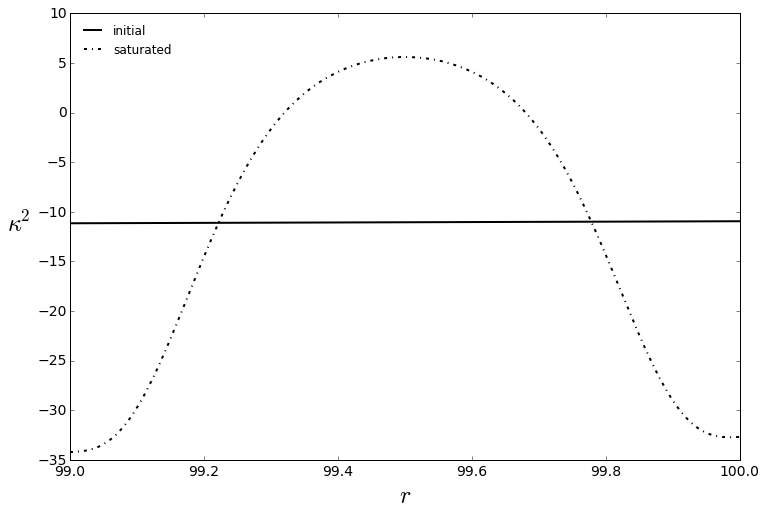

In [112]:
plt.plot(prof_data_ic['scales']['r']['1.0'][:],prof_data_ic['tasks']['epicyclic_freq_sq'][0,0,:],label='initial',color='k',linewidth=2)
plt.plot(prof_data_sat['scales']['r']['1.0'][:],prof_data_sat['tasks']['epicyclic_freq_sq'][-1,0,:],label='saturated',color='k',linestyle='-.',linewidth=2)
plt.xlabel(r"$r$",fontsize=24)
plt.ylabel(r"$\kappa^2$",fontsize=24,rotation='horizontal',labelpad=20)
plt.legend(loc='upper left').draw_frame(False)
a = plt.gca()
a.tick_params(labelsize=14)


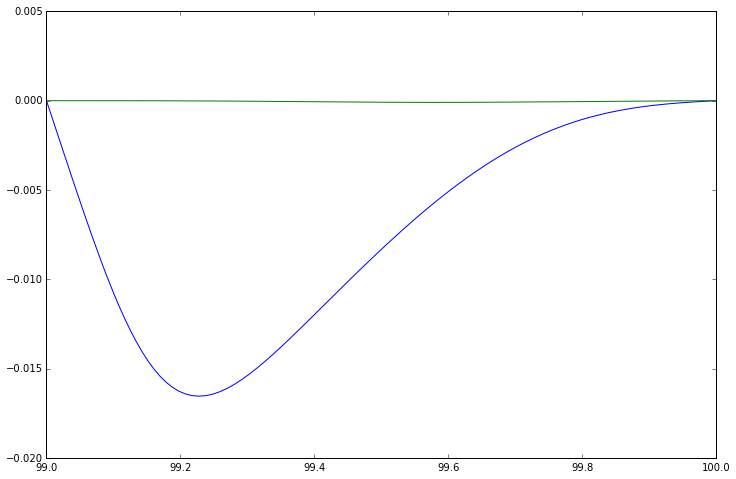

In [80]:
plt.plot(data['scales']['r']['1.0'][:],(data['tasks']['v'][-1,0,:]-data['tasks']['v'][0,0,:]))
plt.plot(data['scales']['r']['1.0'][:],(data['tasks']['v'][1,0,:]-data['tasks']['v'][0,0,:]))

#plt.plot(data['scales']['r']['1.0'][:],(data['tasks']['v'][2,0,:]))

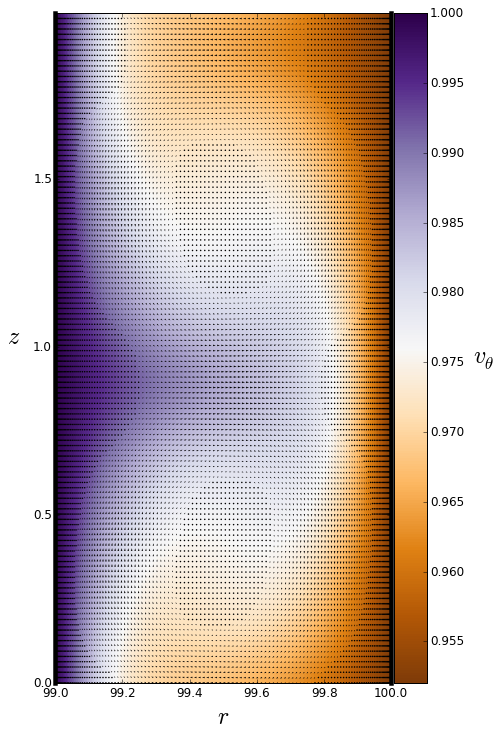

In [98]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
img = ax.pcolormesh(data['scales']['r']['1.0'][:], data['scales']['z']['1.0'][:],data['tasks']['v'][-1],cmap='PuOr')
img.axes.axis('image')
ax.quiver(data['scales']['r']['1.0'][:], data['scales']['z']['1.0'][:],data['tasks']['u'][-1],data['tasks']['w'][-1], width=0.005)
cb = fig.colorbar(img, pad=0.005)
cb_ax = cb.ax
for a in [cb_ax, ax]:
    a.tick_params(labelsize=12)


for axis in ['left','right']:
    ax.spines[axis].set_linewidth(4.5)
    
ax.set_xlabel(r'$r$',fontsize=24)
ax.set_ylabel(r'$z$',rotation='horizontal',fontsize=24,labelpad=20)
cb_ax.set_ylabel(r'$v_{\theta}$',fontsize=24,rotation='horizontal',labelpad=20)